In [24]:
# Step 1: Imports
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import joblib


In [25]:
df = pd.read_csv(r'C:\Users\SreeKeerthiReddyThat\Downloads\framingham.csv')

In [26]:
features = ['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
            'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
            'diaBP', 'BMI', 'heartRate', 'glucose']

target = 'TenYearCHD'

In [27]:
X = df[features]
y = df[target]

In [28]:
#null values
X = X.fillna(X.median())

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

In [30]:
# Step 4: Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 5: Apply SMOTE only to training set
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

# Optional: show new distribution
print("✅ Class distribution after SMOTE (train set only):")
print(pd.Series(y_train_resampled).value_counts())


✅ Class distribution after SMOTE (train set only):
TenYearCHD
0    2877
1    2877
Name: count, dtype: int64


In [31]:
# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [32]:
from sklearn.ensemble import AdaBoostClassifier

# Step 6: Train AdaBoost with tuned hyperparameters
model = AdaBoostClassifier(n_estimators=100, learning_rate=0.5, random_state=42)
model.fit(X_train_resampled, y_train_resampled)



c:\Users\SreeKeerthiReddyThat\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier(learning_rate=0.5, n_estimators=100, random_state=42)

✅ Accuracy: 0.714622641509434

✅ Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.75      0.82       719
           1       0.27      0.50      0.35       129

    accuracy                           0.71       848
   macro avg       0.58      0.62      0.58       848
weighted avg       0.80      0.71      0.75       848



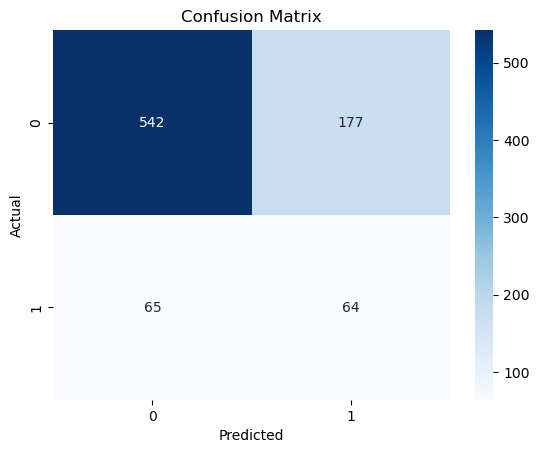

In [33]:
# Step 7: Predict and evaluate
y_pred = model.predict(X_test_scaled)

print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("\n✅ Classification Report:\n", classification_report(y_test, y_pred))

# Optional: Plot confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()



In [34]:
with open("ada_model.pkl", "wb") as f:
    pickle.dump(model, f)

In [35]:
with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)


In [36]:
joblib.dump(model, "ada_model.joblib")

['ada_model.joblib']

In [37]:
joblib.dump(scaler, "scaler.joblib")

['scaler.joblib']

In [38]:
with open("ada_model.pkl", "rb") as f:
    loaded_model = pickle.load(f)

In [39]:
with open("scaler.pkl", "rb") as f:
    loaded_scaler = pickle.load(f)


In [40]:
sample_input = X_test.iloc[0:1]
sample_scaled = loaded_scaler.transform(sample_input)
prediction = loaded_model.predict(sample_scaled)

print("Predicted TenYearCHD:", prediction[0])

Predicted TenYearCHD: 0


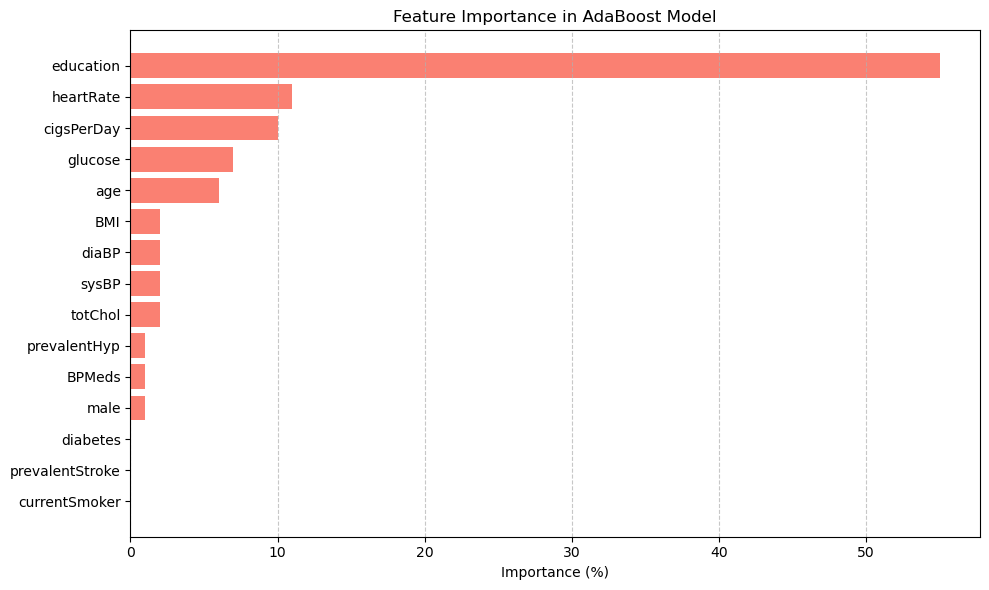

In [41]:
import matplotlib.pyplot as plt
import pandas as pd

# Get feature importances from AdaBoost model
importances = model.feature_importances_

# Convert to percentages
importances_percent = 100.0 * (importances / importances.sum())

# Create DataFrame
feature_names = X.columns
feat_importances = pd.DataFrame({
    'Feature': feature_names,
    'Importance (%)': importances_percent
})

# Sort by importance (ascending for barh plot)
feat_importances.sort_values(by='Importance (%)', ascending=True, inplace=True)
plt.figure(figsize=(10, 6))
plt.barh(feat_importances['Feature'], feat_importances['Importance (%)'], color='salmon')
plt.xlabel('Importance (%)')
plt.title('Feature Importance in AdaBoost Model')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



In [42]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

# Predictions
y_train_pred = model.predict(X_train_scaled)
y_test_pred = model.predict(X_test_scaled)

# Evaluation function
def evaluate_model(y_true, y_pred, dataset_name):
    print(f"\n📊 Evaluation Metrics for {dataset_name}:")
    print(f"Accuracy  : {accuracy_score(y_true, y_pred):.4f}")
    print(f"Precision : {precision_score(y_true, y_pred):.4f}")
    print(f"Recall    : {recall_score(y_true, y_pred):.4f}")
    print(f"F1 Score  : {f1_score(y_true, y_pred):.4f}")
    print("\nConfusion Matrix:\n", confusion_matrix(y_true, y_pred))
    print("\nClassification Report:\n", classification_report(y_true, y_pred))

# Evaluate on Training Set
evaluate_model(y_train, y_train_pred, "Training Set")

# Evaluate on Testing Set
evaluate_model(y_test, y_test_pred, "Testing Set")



📊 Evaluation Metrics for Training Set:
Accuracy  : 0.7155
Precision : 0.2841
Recall    : 0.5748
F1 Score  : 0.3802

Confusion Matrix:
 [[2131  746]
 [ 219  296]]

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.74      0.82      2877
           1       0.28      0.57      0.38       515

    accuracy                           0.72      3392
   macro avg       0.60      0.66      0.60      3392
weighted avg       0.81      0.72      0.75      3392


📊 Evaluation Metrics for Testing Set:
Accuracy  : 0.7146
Precision : 0.2656
Recall    : 0.4961
F1 Score  : 0.3459

Confusion Matrix:
 [[542 177]
 [ 65  64]]

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.75      0.82       719
           1       0.27      0.50      0.35       129

    accuracy                           0.71       848
   macro avg       0.58      0.62      0.58       848
weighted avg       0.80      0

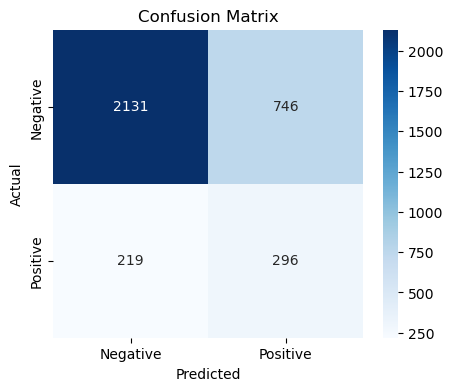

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Manually specified confusion matrix
cm = np.array([[2131, 746],
               [219,  296]])

# Labels for the axes
labels = ['Negative', 'Positive']

plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
